In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class estimator_ave_var():
    def __init__(self, m, beta, a, b):
        self.m = m
        self.beta = beta
        self.a = a
        self.b = b
        self.m_esti = 0
        self.beta_esti = 0
        self.a_esti = 0
        self.b_esti = 0
    
    # パラメータを解析的に計算
    def calc_beta(self, x):
        self.beta_esti = x.size + self.beta
        return self.beta_esti
    def calc_m(self, x):
        self.m_esti = (np.sum(x) + self.beta*self.m) / self.beta_esti
        return self.m_esti
    def calc_a(self, x):
        self.a_esti = x.size/2.0 + self.a
        return self.a_esti
    def calc_b(self, x):
        self.b_esti = (np.sum(x**2) + self.beta*self.m**2 - self.beta_esti*self.m_esti**2) / 2.0 + self.b
        return self.b_esti
    
    # 平均と分散(精度)を取得
    def get_ave(self):
        return self.m_esti
    def get_var(self):
        return self.a_esti/self.b_esti

In [3]:
class gauss():
    def __init__(self, mu, sigma2):
        self.mu = mu
        self.sigma2 = sigma2
    def func(self, x):
        return 1.0/np.sqrt(2*np.pi*self.sigma2)*np.exp(-(x-self.mu)**2/(2*self.sigma2))

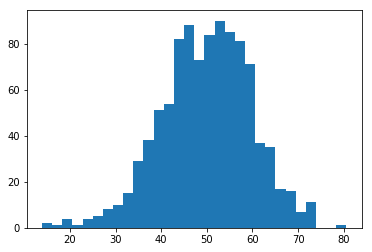

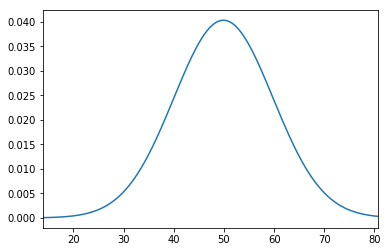

In [11]:
# 平均 50, 標準偏差 10 の正規乱数を1,000件生成
x = np.random.normal(50, 10, 1000)
# 平均 80, 標準偏差 6 の正規乱数を1,000件生成
#x2 = np.random.normal(80, 6, 1000)
#x = np.hstack((x1, x2)) # 連結

# ヒストグラムを出力
plt.hist(x, bins=30)
plt.show()

# 平均のパラメータを推定
eav = estimator_ave_var(m=20.0, beta=1.0, a=1.0, b=1.0)
eav.calc_beta(x)
eav.calc_m(x)
eav.calc_a(x)
eav.calc_b(x)

mu = eav.get_ave()
sigma2 = 1.0/eav.get_var() # 精度の逆数

# 求めた平均と分散を用いてガウス分布を定義 分布の平均を代表とする
g = gauss(mu, sigma2)

x_ary = np.linspace(0, 100, 1000)
y_ary = g.func(x_ary)
plt.xlim(np.min(x), np.max(x))
plt.plot(x_ary, y_ary)